# **Data Preprocessing**

Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model.

When creating a machine learning project, it is not always a case that we come across the clean and formatted data. And while doing any operation with data, it is mandatory to clean it and put in a formatted way. So for this, we use data preprocessing task.

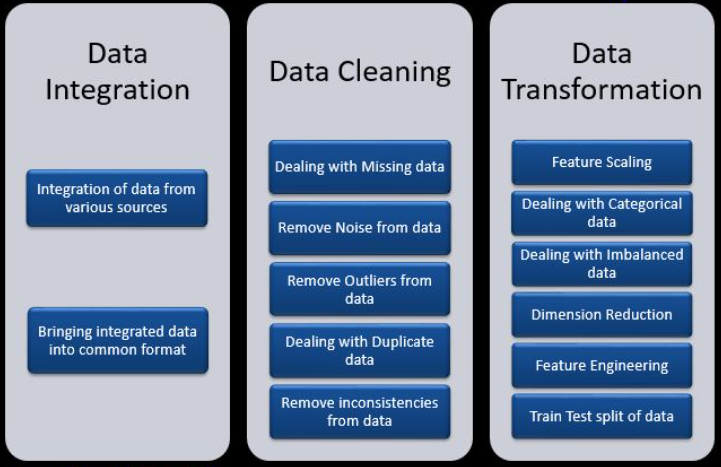

In [ ]:
import pandas as pd
import numpy as np
import scipy as sci

In [ ]:
df = pd.read_csv("/content/sample_data/nba.csv")

In [ ]:
df.sample(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
326,Jorge Gutierrez,Charlotte Hornets,12.0,PG,27.0,6-3,189.0,California,189455.0
386,Wilson Chandler,Denver Nuggets,21.0,SF,29.0,6-8,225.0,DePaul,10449438.0
38,Robin Lopez,New York Knicks,8.0,C,28.0,7-0,255.0,Stanford,12650000.0
431,Ed Davis,Portland Trail Blazers,17.0,C,27.0,6-10,240.0,North Carolina,6980802.0
350,Briante Weber,Miami Heat,12.0,PG,23.0,6-2,165.0,Virginia Commonwealth,NaN
271,Zach Randolph,Memphis Grizzlies,50.0,PF,34.0,6-9,260.0,Michigan State,9638555.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348.0
359,Brandon Jennings,Orlando Magic,55.0,PG,26.0,6-1,169.0,NaN,8344497.0
311,Kirk Hinrich,Atlanta Hawks,12.0,SG,35.0,6-4,190.0,Kansas,2854940.0
441,Noah Vonleh,Portland Trail Blazers,21.0,PF,20.0,6-9,240.0,Indiana,2637720.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [ ]:
df.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [ ]:
df.describe(include=['object'])

,Name,Team,Position,Height,College
count,457,457,457,457,373
unique,457,30,5,18,118
top,JaVale McGee,New Orleans Pelicans,SG,6-9,Kentucky
freq,1,19,102,59,22


In [ ]:
df.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

**Handling Missing Values: 1. Deleting only the rows/columns with missing values**

In [ ]:
df1 = df.copy()
df1 = df1.dropna(axis=0)
df1.isna().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [ ]:
df1.shape

(364, 9)

**Handling Missing Values: 2. Data Imputing missing values with Mean/Median/Mode**


In [ ]:
df2 = df.copy()
df2['Salary']=df2['Salary'].fillna(df2['Salary'].mean())
df2.dropna(axis=0,inplace=True, how='any')
df2.isna().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [ ]:
df2.shape

(373, 9)

**Handling Missing Values: 3. Simple Imputer**


In [ ]:
from sklearn.impute import SimpleImputer
df3 = df.copy()
df3['Salary_Missing'] = df3['Salary'].isnull()
df3.dropna(axis=0,inplace=True, how='any', subset=['Name', 'Team', 'Position', 'Height', 'College'])

my_imputer = SimpleImputer(missing_values=np.NaN, strategy = 'mean') # the imputation strategy can be 'mean'/'median'/'most_frequent'/'constant'
new_data = my_imputer.fit_transform(df3['Salary'].values.reshape(-1,1))[:,0]
df3.Salary = new_data

df3.isnull().sum()

Name              0
Team              0
Number            0
Position          0
Age               0
Height            0
Weight            0
College           0
Salary            0
Salary_Missing    0
dtype: int64

In [ ]:
df3.sample(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Salary_Missing
363,Victor Oladipo,Orlando Magic,5.0,SG,24.0,6-4,210.0,Indiana,5192520.0,False
296,Matt Bonner,San Antonio Spurs,15.0,C,36.0,6-10,235.0,Florida,947276.0,False
58,Nik Stauskas,Philadelphia 76ers,11.0,SG,22.0,6-6,205.0,Michigan,2869440.0,False
429,Pat Connaughton,Portland Trail Blazers,5.0,SG,23.0,6-5,206.0,Notre Dame,625093.0,False
319,Mike Scott,Atlanta Hawks,32.0,PF,27.0,6-8,237.0,Virginia,3333333.0,False
202,Solomon Hill,Indiana Pacers,44.0,SF,25.0,6-7,225.0,Arizona,1358880.0,False
56,Jahlil Okafor,Philadelphia 76ers,8.0,C,20.0,6-11,275.0,Duke,4582680.0,False
352,Justise Winslow,Miami Heat,20.0,SF,20.0,6-7,225.0,Duke,2481720.0,False
221,Steve Novak,Milwaukee Bucks,6.0,SF,32.0,6-10,225.0,Marquette,295327.0,False
312,Al Horford,Atlanta Hawks,15.0,C,30.0,6-10,245.0,Florida,12000000.0,False


**Formatting data**

In [ ]:
df3['Height_In_Inches'] = df3['Height'].apply(lambda x: 12*int(x[:1]) + int(x[2:]))
df3.drop('Height', inplace=True, axis=1)

In [ ]:
df3.sample(5)

,Name,Team,Number,Position,Age,Weight,College,Salary,Salary_Missing,Height_In_Inches
92,Jeff Ayres,Los Angeles Clippers,19.0,PF,29.0,250.0,Arizona State,111444.0,False,81
261,Vince Carter,Memphis Grizzlies,15.0,SG,39.0,220.0,North Carolina,4088019.0,False,78
223,Jabari Parker,Milwaukee Bucks,12.0,PF,21.0,250.0,Duke,5152440.0,False,80
60,Christian Wood,Philadelphia 76ers,35.0,PF,20.0,220.0,UNLV,525093.0,False,83
226,Rashad Vaughn,Milwaukee Bucks,20.0,SG,19.0,202.0,UNLV,1733040.0,False,78


**Removing Duplicates**

In [ ]:
df4 = df3.copy()
df4.duplicated().sum()

0

In [ ]:
# Duplicating the instances
df4 = pd.concat([df4]*2, ignore_index=True)


In [ ]:
df4.duplicated().sum()

373

In [ ]:
df4[df4.duplicated()]

,Name,Team,Number,Position,Age,Weight,College,Salary,Salary_Missing,Height_In_Inches
373,Avery Bradley,Boston Celtics,0.0,PG,25.0,180.0,Texas,7.730337e+06,False,74
374,Jae Crowder,Boston Celtics,99.0,SF,25.0,235.0,Marquette,6.796117e+06,False,78
375,John Holland,Boston Celtics,30.0,SG,27.0,205.0,Boston University,4.620311e+06,True,77
376,R.J. Hunter,Boston Celtics,28.0,SG,22.0,185.0,Georgia State,1.148640e+06,False,77
377,Jordan Mickey,Boston Celtics,55.0,PF,21.0,235.0,LSU,1.170960e+06,False,80
...,...,...,...,...,...,...,...,...,...,...
741,Rodney Hood,Utah Jazz,5.0,SG,23.0,206.0,Duke,1.348440e+06,False,80
742,Chris Johnson,Utah Jazz,23.0,SF,26.0,206.0,Dayton,9.813480e+05,False,78
743,Trey Lyles,Utah Jazz,41.0,PF,20.0,234.0,Kentucky,2.239800e+06,False,82
744,Shelvin Mack,Utah Jazz,8.0,PG,26.0,203.0,Butler,2.433333e+06,False,75


In [ ]:
df4.drop_duplicates(keep = 'first', inplace = True) # keep may be one of the 'first'/'last'/False

In [ ]:
df4.duplicated().sum()

0

**Encoding the categorical data**

In [ ]:
# Label Encoding of Name, which is not necessary in reality

from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
df4['Name']= label_encoder.fit_transform(df4['Name'])
df4['College']= label_encoder.fit_transform(df4['College'])

df4.sample(10)

,Name,Team,Number,Position,Age,Weight,College,Salary,Salary_Missing,Height_In_Inches
279,204,Charlotte Hornets,15.0,PG,26.0,184.0,20,12000000.0,False,73
180,354,Milwaukee Bucks,11.0,PG,21.0,194.0,89,1662360.0,False,75
260,214,Atlanta Hawks,12.0,SG,35.0,190.0,43,2854940.0,False,76
199,52,Dallas Mavericks,25.0,SF,27.0,230.0,28,15361500.0,False,82
360,244,Portland Trail Blazers,24.0,C,26.0,235.0,26,1415520.0,False,83
241,12,New Orleans Pelicans,15.0,SF,29.0,225.0,0,1320000.0,False,78
103,25,Phoenix Suns,20.0,SG,21.0,200.0,45,1160160.0,False,77
297,19,Orlando Magic,44.0,PF,26.0,250.0,86,2380593.0,False,81
67,97,Golden State Warriors,23.0,PF,26.0,230.0,58,14260870.0,False,79
127,0,Chicago Bulls,0.0,PG,31.0,161.0,74,2250000.0,False,72


In [ ]:
# Ordinal Encoding

from sklearn.preprocessing import OrdinalEncoder
ord1 = OrdinalEncoder()

ord1.fit([df4['Position']])

df4['Position'] = ord1.fit_transform(df4[['Position']])
df4.sample(10)

,Name,Team,Number,Position,Age,Weight,College,Salary,Salary_Missing,Height_In_Inches
222,136,Memphis Grizzlies,0.0,1.0,25.0,227.0,0,845059.0,False,81
249,246,San Antonio Spurs,15.0,0.0,36.0,235.0,28,947276.0,False,82
65,325,Golden State Warriors,30.0,2.0,28.0,190.0,22,11370786.0,False,75
13,240,Brooklyn Nets,22.0,4.0,24.0,190.0,72,845059.0,False,75
371,320,Utah Jazz,8.0,2.0,26.0,203.0,11,2433333.0,False,75
309,241,Washington Wizards,5.0,1.0,26.0,245.0,43,8000000.0,False,82
267,258,Atlanta Hawks,32.0,1.0,27.0,237.0,103,3333333.0,False,80
152,326,Detroit Pistons,22.0,2.0,36.0,172.0,54,2170465.0,False,75
29,63,New York Knicks,11.0,3.0,25.0,210.0,114,845059.0,False,80
218,362,Memphis Grizzlies,15.0,4.0,39.0,220.0,66,4088019.0,False,78


In [ ]:
# One_hot Encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

enc = enc.fit_transform(df4[['Team']]).toarray()
encoded_colm = pd.DataFrame(enc)

df4 = pd.concat([df4, encoded_colm], axis = 1)

df4 = df4.drop(['Team'], axis = 1)
df4.head(10)

,Name,Number,Position,Age,Weight,College,Salary,Salary_Missing,Height_In_Inches,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,29,0.0,2.0,25.0,180.0,93,7.730337e+06,False,74,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,139,99.0,3.0,25.0,235.0,52,6.796117e+06,False,78,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,177,30.0,4.0,27.0,205.0,8,4.620311e+06,True,77,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,288,28.0,4.0,22.0,185.0,33,1.148640e+06,False,77,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,189,55.0,1.0,21.0,235.0,46,1.170960e+06,False,80,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,202,41.0,0.0,25.0,238.0,35,2.165160e+06,False,84,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,336,12.0,2.0,22.0,190.0,51,1.824360e+06,False,74,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,238,36.0,2.0,22.0,220.0,72,3.431040e+06,False,76,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,152,7.0,0.0,24.0,260.0,70,2.569260e+06,False,81,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,130,4.0,2.0,27.0,185.0,107,6.912869e+06,False,69,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df4.drop(['Salary_Missing'], axis=1, inplace=True)

In [ ]:
df5 = df4.pop('Salary') 
df4['Salary']=df5
df4.sample(10)

,Name,Number,Position,Age,Weight,College,Height_In_Inches,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,Salary
260,214,12.0,4.0,35.0,190.0,43,76,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2854940.0
167,282,13.0,3.0,26.0,220.0,30,81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17120106.0
235,22,23.0,1.0,23.0,253.0,45,82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7070730.0
352,103,17.0,0.0,27.0,240.0,66,82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6980802.0
257,80,30.0,1.0,35.0,250.0,117,81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1499187.0
237,343,16.0,2.0,30.0,195.0,29,74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1164858.0
24,95,15.0,2.0,28.0,205.0,94,75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,947276.0
82,233,12.0,1.0,29.0,230.0,96,80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,947276.0
293,93,3.0,0.0,26.0,245.0,98,84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,947276.0
270,190,12.0,2.0,27.0,189.0,12,75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,189455.0


**Feature Scaling - MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
array = df4.values
x=array[:,0:37]
y=array[:,37]
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(x)
np.set_printoptions(precision=3)
rescaledX[0:5,:]


array([[0.078, 0.   , 0.5  , 0.286, 0.161, 0.795, 0.294, 0.   , 1.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.374, 1.   , 0.75 , 0.286, 0.627, 0.444, 0.529, 0.   , 1.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.476, 0.303, 1.   , 0.381, 0.373, 0.068, 0.471, 0.   , 1.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.774, 0.283, 1.   , 0.143, 0.203, 0.282, 0.471, 0.   , 1.   ,
        0.   , 0.   , 0.   , 

**Feature Scaling - StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(x)
rescaledX=scaler.transform(x)
rescaledX[0:5,:]

array([[-1.458, -1.13 , -0.132, -0.388, -1.579,  1.09 , -1.462, -0.174,
         5.262, -0.19 , -0.19 , -0.182, -0.182, -0.182, -0.157, -0.205,
        -0.182, -0.174, -0.182, -0.197, -0.182, -0.219, -0.174, -0.197,
        -0.157, -0.212, -0.174, -0.197, -0.166, -0.205, -0.19 , -0.205,
        -0.19 , -0.174, -0.166, -0.166, -0.19 ],
       [-0.436,  5.49 ,  0.601, -0.388,  0.612, -0.171, -0.253, -0.174,
         5.262, -0.19 , -0.19 , -0.182, -0.182, -0.182, -0.157, -0.205,
        -0.182, -0.174, -0.182, -0.197, -0.182, -0.219, -0.174, -0.197,
        -0.157, -0.212, -0.174, -0.197, -0.166, -0.205, -0.19 , -0.205,
        -0.19 , -0.174, -0.166, -0.166, -0.19 ],
       [-0.084,  0.876,  1.334,  0.083, -0.583, -1.525, -0.555, -0.174,
         5.262, -0.19 , -0.19 , -0.182, -0.182, -0.182, -0.157, -0.205,
        -0.182, -0.174, -0.182, -0.197, -0.182, -0.219, -0.174, -0.197,
        -0.157, -0.212, -0.174, -0.197, -0.166, -0.205, -0.19 , -0.205,
        -0.19 , -0.174, -0.166, -0.166

**Feature Scaling - Normalizer**

In [ ]:
from sklearn.preprocessing import Normalizer
scaler=Normalizer().fit(x)
normalizedX=scaler.transform(x)
normalizedX[0:5,:]

array([[0.132, 0.   , 0.009, 0.114, 0.822, 0.425, 0.338, 0.   , 0.005,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.454, 0.323, 0.01 , 0.082, 0.767, 0.17 , 0.255, 0.   , 0.003,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.622, 0.105, 0.014, 0.095, 0.72 , 0.028, 0.271, 0.   , 0.004,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.813, 0.079, 0.011, 0.062, 0.522, 0.093, 0.217, 0.   , 0.003,
        0.   , 0.   , 0.   , 

**Binarizing the data**

In [ ]:
# Binarizing Data using Binarizer
from sklearn.preprocessing import Binarizer
binarizer=Binarizer(threshold=0.0).fit(x)
binaryX=binarizer.transform(x)
binaryX[0:5,:]


array([[1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]])

**Splitting the Data to Training and Test Sets**

In [ ]:
# split a dataset into train and test sets
from sklearn.model_selection import train_test_split


# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(261, 37) (112, 37) (261,) (112,)


In [ ]:
X_train

array([[359.,   1.,   2., ...,   0.,   0.,   0.],
       [295.,   2.,   2., ...,   0.,   0.,   0.],
       [317.,  13.,   2., ...,   0.,   0.,   0.],
       ...,
       [ 28.,  25.,   2., ...,   0.,   0.,   0.],
       [189.,  55.,   1., ...,   0.,   0.,   0.],
       [198.,  20.,   3., ...,   0.,   0.,   0.]])